## Build a time series forecast model using LSTM. Use the number of periods for forecast batch as per your wish. The number of data in train and test can also be according to your wish

### Long Short Term Memory - RNN

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import data

data = pd.read_excel('F:\Skillenable\Data frames\Cement-Consumption.xlsx')
data.head()

,Period,Month,Cement Consumption
0,1,2001-04-01,333224
1,2,2001-05-01,399256
2,3,2001-06-01,626754
3,4,2001-07-01,366388
4,5,2001-08-01,361452


In [2]:
df_cement = data.drop(columns=['Period'])

In [3]:
df_cement.head()

,Month,Cement Consumption
0,2001-04-01,333224
1,2001-05-01,399256
2,2001-06-01,626754
3,2001-07-01,366388
4,2001-08-01,361452


In [4]:
df_cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               116 non-null    datetime64[ns]
 1   Cement Consumption  116 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [5]:
# indexing 
df_cement.set_index('Month', inplace = True)
df_cement.head()

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452


<AxesSubplot:>

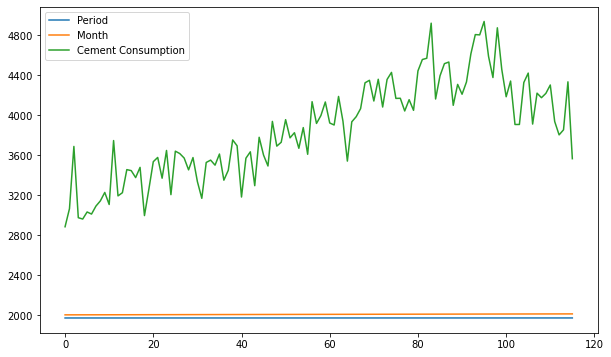

In [9]:
data.plot(figsize= (10,6))   # plotting the data

In [10]:
 # taking last 20 data as test data
len(df_cement)-20

96

In [11]:
# saperate the data as train and test

train = df_cement.iloc[:96]
test = df_cement.iloc[96:]

len(train), len(test)

(96, 20)

In [12]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()  # assigning the object

In [14]:
train_scale = scaler.fit_transform(train) # scaled the data
test_scale = scaler.fit_transform(test)

In [15]:
test_scale

array([[0.78219776],
       [0.61997942],
       [1.        ],
       [0.68286731],
       [0.47315947],
       [0.59317026],
       [0.26124559],
       [0.26139614],
       [0.58185149],
       [0.65398593],
       [0.2644386 ],
       [0.50051439],
       [0.46597049],
       [0.49891475],
       [0.56301126],
       [0.28382459],
       [0.18183643],
       [0.22048085],
       [0.58717944],
       [0.        ]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [17]:
# We will take 15 values to predict the time series data 

n_input =15
generator = TimeseriesGenerator(train_scale, train_scale, length = n_input, batch_size = 1)

In [18]:
train_scale[:15]

array([[0.        ],
       [0.08803023],
       [0.39131803],
       [0.04421242],
       [0.03763201],
       [0.07207648],
       [0.06186326],
       [0.1007071 ],
       [0.12606218],
       [0.16722437],
       [0.10848067],
       [0.41991132],
       [0.15038541],
       [0.16596588],
       [0.27841798]])

In [19]:
generator[0]   # #IT'S OUR FIRST GENERATOR OF FIRST INDEX; give first 12 data

(array([[[0.        ],
         [0.08803023],
         [0.39131803],
         [0.04421242],
         [0.03763201],
         [0.07207648],
         [0.06186326],
         [0.1007071 ],
         [0.12606218],
         [0.16722437],
         [0.10848067],
         [0.41991132],
         [0.15038541],
         [0.16596588],
         [0.27841798]]]),
 array([[0.27348535]]))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
## Initializing the RNN

# Defining the model

rnn = Sequential()

In [22]:
# Adding input & hidden layers
rnn.add(LSTM(units=100, activation = 'relu', input_shape= (n_input, 1)))

In [23]:
# output layer
rnn.add(Dense(units=1)) ## output = 1

In [24]:
# Compiling the model
rnn.compile(optimizer= 'adam', loss='mse')

In [26]:
# Fitting the model
rnn.fit(generator, epochs=75)

Epoch 1/75
81/81 [==============================] - 1s 4ms/step - loss: 0.0483
Epoch 2/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 3/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 4/75
81/81 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 5/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 6/75
81/81 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 7/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 8/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 9/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 10/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 11/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 12/75
81/81 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 13/75
81/81 [==============================

In [28]:
test_scale

array([[0.78219776],
       [0.61997942],
       [1.        ],
       [0.68286731],
       [0.47315947],
       [0.59317026],
       [0.26124559],
       [0.26139614],
       [0.58185149],
       [0.65398593],
       [0.2644386 ],
       [0.50051439],
       [0.46597049],
       [0.49891475],
       [0.56301126],
       [0.28382459],
       [0.18183643],
       [0.22048085],
       [0.58717944],
       [0.        ]])

In [31]:
predict_train = train_scale[-15:]  #last 15 values

In [32]:
predict_train = predict_train.reshape(1, n_input,1)


In [33]:
predict_train.shape

(1, 15, 1)

In [34]:
rnn.predict(train_scale[-15:])

array([[0.18612522],
       [0.1867516 ],
       [0.20414597],
       [0.16534342],
       [0.17765576],
       [0.18402153],
       [0.18484576],
       [0.16204795],
       [0.17309712],
       [0.1678642 ],
       [0.17438014],
       [0.18898976],
       [0.19851026],
       [0.19837007],
       [0.20499276]], dtype=float32)

In [35]:
rnn.predict(predict_train)  # prediction of first data after scaling

array([[0.81909865]], dtype=float32)

In [36]:
test_scale[0]   #here we can see the difference in predicted and real value

array([0.78219776])